# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading Dataset

In [2]:
# Reading csv file.
train = pd.read_csv('train.csv')

In [3]:
# Top 5 rows of dataset.
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


## Descriptive statistics of the dataset

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


###### We use describe method which provides basic statistical information for each numeric column including count, mean, standard deviation, minimum, 25th percentile, 50th percentile(median), 75th percentile and maximum

In [5]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [6]:
# Above has shown that maximum purchase has been done through 'Product_Category_1'

## Check for missing values in the data

In [7]:
missing_values = train.isnull().sum()

In [8]:
missing_values

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [9]:
# From above output we can see there are missing values in 'Product_Category_2' and 'Product_Category_3'

In [10]:
# We can also check the precentage of missing data

In [11]:
missing_percentage = (train.isnull().mean() * 100).round(2)
# Display missing percentage
print(missing_percentage)

User_ID                        0.00
Product_ID                     0.00
Gender                         0.00
Age                            0.00
Occupation                     0.00
City_Category                  0.00
Stay_In_Current_City_Years     0.00
Marital_Status                 0.00
Product_Category_1             0.00
Product_Category_2            31.57
Product_Category_3            69.67
Purchase                       0.00
dtype: float64


In [12]:
# There is 31.57% data missing in 'Product_Category_2' and 69.67% data mising in 'Product_Category_3'

## Check for unique values in the data

In [13]:
# For checking the unique values in each column.
for column in train.columns:
    unique_values = train[column].unique()
    print(f"Unique values in {column}:\n{unique_values}\n")

Unique values in User_ID:
[1000001 1000002 1000003 ... 1004113 1005391 1001529]

Unique values in Product_ID:
['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']

Unique values in Gender:
['F' 'M']

Unique values in Age:
['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']

Unique values in Occupation:
[10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]

Unique values in City_Category:
['A' 'C' 'B']

Unique values in Stay_In_Current_City_Years:
['2' '4+' '3' '1' '0']

Unique values in Marital_Status:
[0 1]

Unique values in Product_Category_1:
[ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]

Unique values in Product_Category_2:
[nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]

Unique values in Product_Category_3:
[nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]

Unique values in Purchase:
[ 8370 15200  1422 ...   135   123   613]



In [14]:
# For calculating the number of unique values in each column
train.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

### Perform EDA

Text(0.5, 1.0, 'Distribution of Gender')

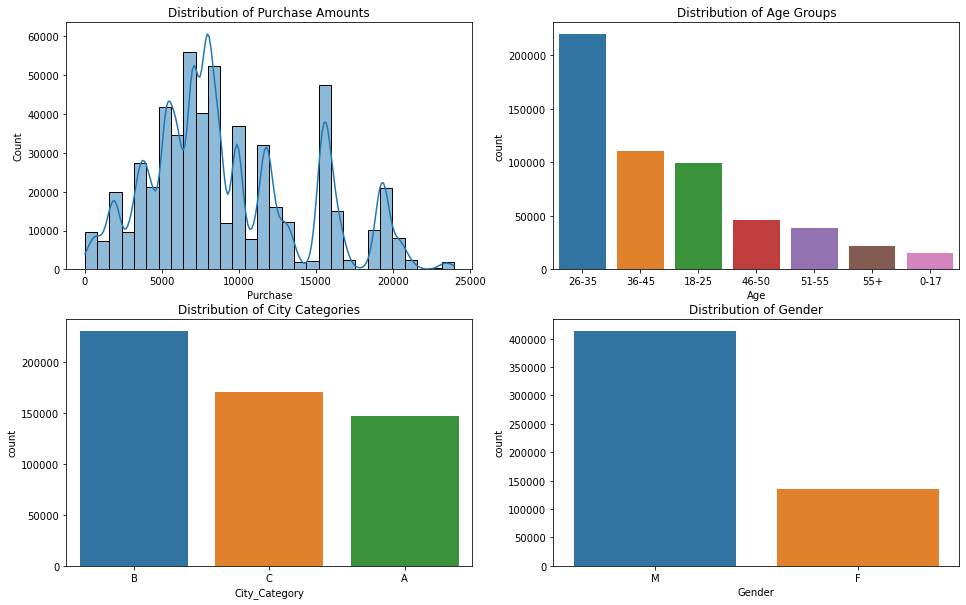

In [15]:
plt.figure(figsize=(16, 10))

# Distribution of Purchase amounts
plt.subplot(2, 2, 1)
sns.histplot(train['Purchase'], bins=30, kde=True)
plt.title('Distribution of Purchase Amounts')

# Distribution of Age groups
plt.subplot(2, 2, 2)
sns.countplot(x='Age', data=train, order=train['Age'].value_counts().index)
plt.title('Distribution of Age Groups')

# Distribution of City Categories
plt.subplot(2, 2, 3)
sns.countplot(x='City_Category', data=train, order=train['City_Category'].value_counts().index)
plt.title('Distribution of City Categories')

# Distribution of Gender
plt.subplot(2, 2, 4)
sns.countplot(x='Gender', data=train, order=train['Gender'].value_counts().index)
plt.title('Distribution of Gender')

In [16]:
'''
In above fig:
Distribution of Purchase Amount shows a values of that Purchase spread across different bins or intervals.

Distribution of Age groups shows which age groups are more prevalent.

Distribution of City_Category shows "B" category has most count among all categories.

Distribution of Gender plot has shown a male count is more than female.

''' 

'\nIn above fig:\nDistribution of Purchase Amount shows a values of that Purchase spread across different bins or intervals.\n\nDistribution of Age groups shows which age groups are more prevalent.\n\nDistribution of City_Category shows "B" category has most count among all categories.\n\nDistribution of Gender plot has shown a male count is more than female.\n\n'

## Purchase Distribution with respect to other variables in the dataset.

Text(0.5, 1.0, 'Pairplot of Numeric Columns')

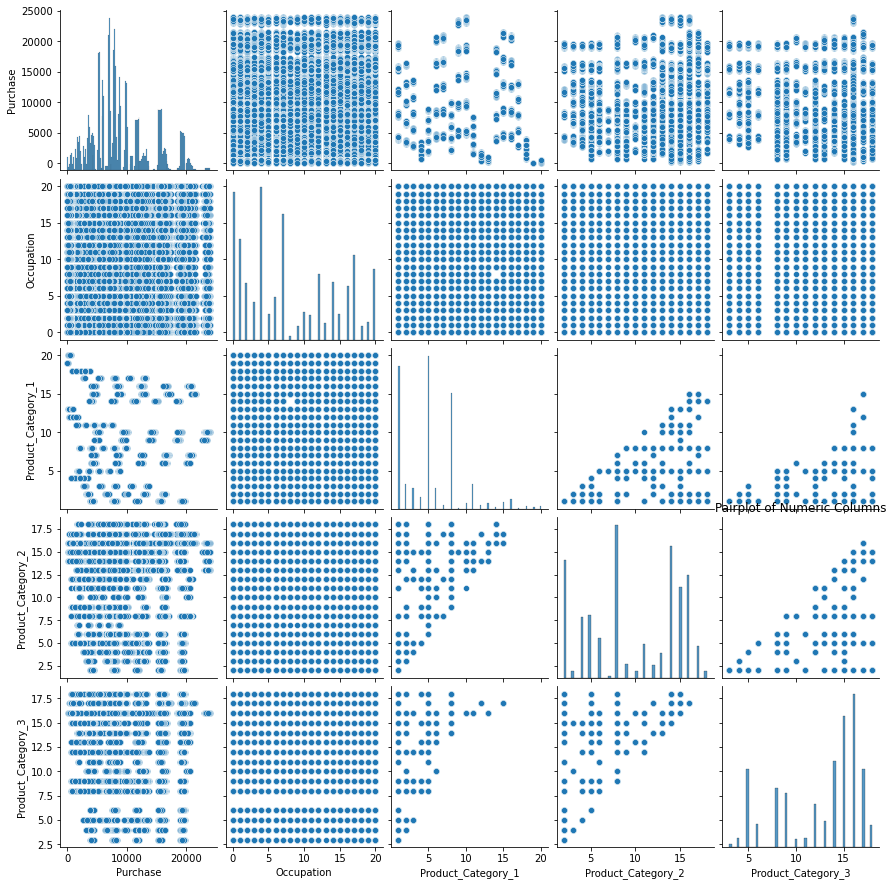

In [17]:
sns.pairplot(train[['Purchase', 'Occupation', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']])
plt.title('Pairplot of Numeric Columns')

In [18]:
# From plot we can see there are maximum purchase of 'Product_Category_2','Product_Category_3','Product_Category_1' respectively.

## check for outliers

Text(0.5, 1.0, 'Boxplot of Purchase Amount by Age Group')

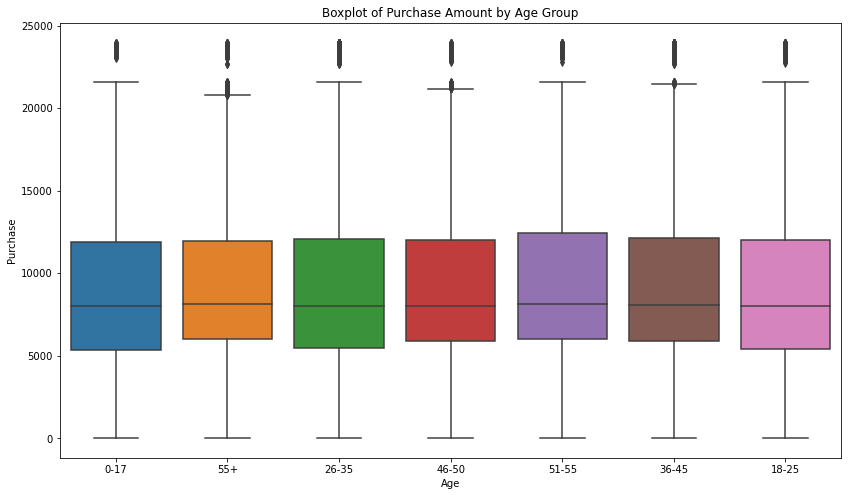

In [19]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Age', y='Purchase', data=train)
plt.title('Boxplot of Purchase Amount by Age Group')

In [20]:
# The above shown diamonds are the outliers.

In [21]:
# Analysis by Gender, Marital Status, City_Category

In [22]:
train.groupby(['City_Category','Gender']).count()

User_ID  Product_ID     Age  Occupation  \
City_Category Gender                                            
A             F         35704       35704   35704       35704   
              M        112016      112016  112016      112016   
B             F         57796       57796   57796       57796   
              M        173377      173377  173377      173377   
C             F         42309       42309   42309       42309   
              M        128866      128866  128866      128866   

                      Stay_In_Current_City_Years  Marital_Status  \
City_Category Gender                                               
A             F                            35704           35704   
              M                           112016          112016   
B             F                            57796           57796   
              M                           173377          173377   
C             F                            42309           42309   
              M                           128866          128866   

                      Product_Category_1  Product_Category_2  \
City_Category Gender                                           
A             F                    35704               23488   
              M                   112016               74873   
B             F                    57796               38700   
              M                   173377              118983   
C             F                    42309               29342   
              M                   128866               91044   

                      Product_Category_3  Purchase  
City_Category Gender                                
A             F                     9168     35704  
              M                    32351    112016  
B             F                    15719     57796  
              M                    53524    173377  
C             F                    12707     42309  
              M                    43352    128866

In [23]:
shoppers = train.groupby(['City_Category','Gender','Marital_Status']).count()['Purchase']
print(shoppers)

City_Category  Gender  Marital_Status
A              F       0                  21827
                       1                  13877
               M       0                  69346
                       1                  42670
B              F       0                  34527
                       1                  23269
               M       0                 102194
                       1                  71183
C              F       0                  22467
                       1                  19842
               M       0                  74370
                       1                  54496
Name: Purchase, dtype: int64


In [24]:
'''City_Category - A shows the unmarried female has more purchase than the married ones. 
                        Similarly unmarried males also have more purchase than the married ones.
   City_Category - B shows the unmarried female has more purchase than the married ones. 
                        Similarly unmarried males also have more purchase than the married ones.
   City_Category - C shows the unmarried female has more purchase than the married ones. 
                        Similarly unmarried males also have more purchase than the married ones.'''

'City_Category - A shows the unmarried female has more purchase than the married ones. \n                        Similarly unmarried males also have more purchase than the married ones.\n   City_Category - B shows the unmarried female has more purchase than the married ones. \n                        Similarly unmarried males also have more purchase than the married ones.\n   City_Category - C shows the unmarried female has more purchase than the married ones. \n                        Similarly unmarried males also have more purchase than the married ones.'

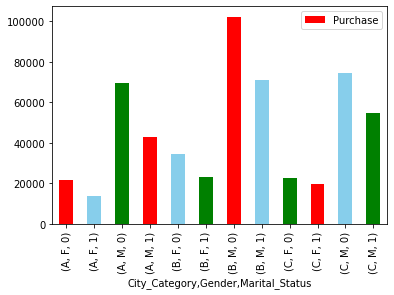

In [25]:
shoppers.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'])
plt.legend()

## Drop unnecessary fields

In [26]:
train.drop(['User_ID','Product_ID','Stay_In_Current_City_Years'],axis =1,inplace = True)

In [27]:
''' As the 'User_ID','Product_ID','Stay_In_Current_City_Years' these columns doesnt affect the purchase amount, 
    so we can drop them easily.'''

" As the 'User_ID','Product_ID','Stay_In_Current_City_Years' these columns doesnt affect the purchase amount, \n    so we can drop them easily."

### Convert categorical data into integer using map function

In [28]:
train['Gender'] = train['Gender'].map({'F':0,'M':1})

In [29]:
train['Gender']

0         0
1         0
2         0
3         0
4         1
         ..
550063    1
550064    0
550065    0
550066    0
550067    0
Name: Gender, Length: 550068, dtype: int64

In [30]:
train['City_Category'] = train['City_Category'].map({'A':0,'B':1,'C':2})

In [31]:
train['City_Category']

0         0
1         0
2         0
3         0
4         2
         ..
550063    1
550064    2
550065    1
550066    2
550067    1
Name: City_Category, Length: 550068, dtype: int64

## Missing value treatment

In [32]:
# As there are no much outliers in Product_Category data thats why we fill it with mean value.

In [33]:
train['Product_Category_2'] = train['Product_Category_2'].fillna(train['Product_Category_2'].mean()).round(0)

In [34]:
train['Product_Category_3'] = train['Product_Category_3'].fillna(train['Product_Category_3'].mean()).round(0)

In [35]:
train.head()

,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0-17,10,0,0,3,10.0,13.0,8370
1,0,0-17,10,0,0,1,6.0,14.0,15200
2,0,0-17,10,0,0,12,10.0,13.0,1422
3,0,0-17,10,0,0,12,14.0,13.0,1057
4,1,55+,16,2,0,8,10.0,13.0,7969


## Data Visualisation

In [36]:
def col_vs_purchase_graph(col,idx):

    groups = train.groupby(col)['Purchase'].sum()
    unique = train[col].unique()

    purchase_total = []

    for i in unique:
        purchase = groups[i]
        purchase_total.append(purchase)

    dict_ = dict(zip(groups,purchase_total))
    sorted_dict = dict(sorted(dict_.items(), key = lambda x:x[1]))
    #print(sorted_dict)
    plt.subplot(2, 3,idx+1)  # Top-right subplot
    plt.bar(unique,purchase_total)

    # Add labels and title
    if col=='Age':
        plt.xticks(rotation='vertical')
    plt.xlabel(col)
    plt.ylabel('total_purchase')
    plt.title(f'subplot {idx+1}')

In [37]:
cols = ['Occupation','Age','Product_Category_1','Product_Category_2','Product_Category_3','City_Category']

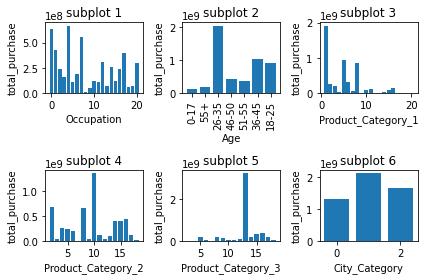

In [38]:
for i in range(len(cols)):
    col_vs_purchase_graph(cols[i],i)
plt.tight_layout()

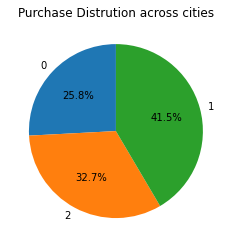

In [39]:
col = 'City_Category'
groups = train.groupby(col)['Purchase'].sum()
unique = train[col].unique()

purchase_total = []

for i in unique:
    purchase = groups[i]
    purchase_total.append(int(purchase))

u = list(unique)
plt.pie(purchase_total,labels=u, autopct='%1.1f%%', startangle=90)
plt.title('Purchase Distrution across cities')
plt.show()

In [40]:
# Above chart has shown that City_cateogry - "0" has 25.8% of total purchase
# Above chart has shown that City_cateogry - "1" has 41.5% of total purchase 
# Above chart has shown that City_cateogry - "2" has 32.7% of total purchase

## Loading test dataset

In [41]:
test = pd.read_csv('test.csv')

In [42]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [43]:
average_age_mapping = {'0-17': 8.5, '18-25': 21.5, '26-35': 30.5, '36-45': 40.5, '46-50': 48, '51-55': 53, '55+': 60}

# Map the "Age" variable to integer values
train['Age_Int'] = train['Age'].map(average_age_mapping)

In [44]:
# Cleaning of Test dataset

In [45]:
test['Gender'] = test['Gender'].map({'F':0,'M':1})

In [46]:
test['Product_Category_2'] = test['Product_Category_2'].fillna(test['Product_Category_2'].mean()).round(0)

In [47]:
test['Product_Category_3'] = test['Product_Category_3'].fillna(test['Product_Category_3'].mean()).round(0)

In [48]:
test.drop(['User_ID','Product_ID','Stay_In_Current_City_Years'],axis =1,inplace = True)

In [49]:
test['City_Category'] = test['City_Category'].map({'A':0,'B':1,'C':2})

In [50]:
test.head()

,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1,46-50,7,1,1,1,11.0,13.0
1,1,26-35,17,2,0,3,5.0,13.0
2,0,36-45,1,1,1,5,14.0,13.0
3,0,36-45,1,1,1,4,9.0,13.0
4,0,26-35,1,2,0,4,5.0,12.0


In [51]:
average_age_mapping = {'0-17': 8.5, '18-25': 21.5, '26-35': 30.5, '36-45': 40.5, '46-50': 48, '51-55': 53, '55+': 60}

# Map the "Age" variable to integer values
test['Age_Int'] = test['Age'].map(average_age_mapping)

In [52]:
test.drop(['Age'],axis = 1, inplace = True)
test.head()

,Gender,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Age_Int
0,1,7,1,1,1,11.0,13.0,48.0
1,1,17,2,0,3,5.0,13.0,30.5
2,0,1,1,1,5,14.0,13.0,40.5
3,0,1,1,1,4,9.0,13.0,40.5
4,0,1,2,0,4,5.0,12.0,30.5


## Spliting the train and test data

In [53]:
# Input Value
X_train = train.drop(['Age','Purchase'],axis =1)

In [54]:
# target Value
y_train = train['Purchase']

# Implementing model

In [55]:
# We can implement Linear Model
from sklearn import linear_model

In [56]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [57]:
reg.predict(test)

array([11234.40070842, 11148.59364968,  8695.43278267, ...,
       10972.89601026,  7013.1057477 ,  9972.59428868])

In [58]:
# we can also implement Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [59]:
model = DecisionTreeRegressor()

In [60]:
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [61]:
model.predict(test)

array([13449.6       ,  9330.45454545,  7813.72727273, ...,
       15468.66666667, 23714.        ,  2111.125     ])